## Testing out the Filter Selection and tilting effects with the 659.9 nm CWL filters



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy.coordinates import Distance
from astropy import units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits

plt.style.use('seaborn-dark-palette')
plt.style.use('ggplot')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

%matplotlib inline

In [2]:
def loadSDSS():
    z=[]
    with open('./data/Skyserver_SQL_1_xyz.csv','r') as f:
        for line in f:
            if line[0]!='#' and len(line)>5:
                tmp = line.split(',')
                z.append(float(tmp[1]))
    with open('./data/Skyserver_SQL_2_xyz.csv','r') as f:
        for line in f:
            if line[0]!='#' and len(line)>5:
                tmp = line.split(',')
                z.append(float(tmp[1]))
    z = np.array(z,'d')
    
    return z

def loadUVES():
    # UVES Sky background files (continuum and emission lines)
    filename4 = homedir+'/Dropbox/UVES_Sky_Background/UVES_sky_all/fluxed_sky_437.fits'
    filename3 = homedir+'/Dropbox/UVES_Sky_Background/UVES_sky_all/fluxed_sky_580L.fits'
    filename1 = homedir+'/Dropbox/UVES_Sky_Background/UVES_sky_all/fluxed_sky_580U.fits'
    filename2 = homedir+'/Dropbox/UVES_Sky_Background/UVES_sky_all/fluxed_sky_860L.fits'
    hdulist1 = fits.open(filename1)
    hdulist2 = fits.open(filename2)
    hdulist3 = fits.open(filename3)
    hdulist4 = fits.open(filename4)

    flux1 = hdulist1[0].data
    flux2 = hdulist2[0].data
    flux3 = hdulist3[0].data
    flux4 = hdulist4[0].data
    
    CRPIX1 = hdulist1[0].header['CRPIX1']
    CRVAL1 = hdulist1[0].header['CRVAL1']
    CDELT1 = hdulist1[0].header['CDELT1']
    #print(CRPIX1,CRVAL1,CDELT1)
    hdulist1.close()
    begin = CRVAL1 - CRPIX1*CDELT1   
    end = begin + len(flux1)*CDELT1
    wavelength1 = np.arange(begin,end,CDELT1)
    #print(len(wavelength1),len(flux1))

    CRPIX1 = hdulist2[0].header['CRPIX1']
    CRVAL1 = hdulist2[0].header['CRVAL1']
    CDELT1 = hdulist2[0].header['CDELT1']
    #print(CRPIX1,CRVAL1,CDELT1)
    hdulist2.close()
    begin = CRVAL1 - CRPIX1*CDELT1   
    end = begin + len(flux2)*CDELT1
    wavelength2 = np.arange(begin,end,CDELT1)
    #print(len(wavelength2),len(flux2))

    CRPIX1 = hdulist3[0].header['CRPIX1']
    CRVAL1 = hdulist3[0].header['CRVAL1']
    CDELT1 = hdulist3[0].header['CDELT1']
    #print(CRPIX1,CRVAL1,CDELT1)
    hdulist3.close()
    begin = CRVAL1 - CRPIX1*CDELT1   
    end = begin + len(flux3)*CDELT1
    wavelength3 = np.arange(begin,end,CDELT1)
    #print(len(wavelength2),len(flux2))
    
    CRPIX1 = hdulist4[0].header['CRPIX1']
    CRVAL1 = hdulist4[0].header['CRVAL1']
    CDELT1 = hdulist4[0].header['CDELT1']
    #print(CRPIX1,CRVAL1,CDELT1)
    hdulist4.close()
    begin = CRVAL1 - CRPIX1*CDELT1   
    end = begin + len(flux4)*CDELT1
    wavelength4 = np.arange(begin,end,CDELT1)
    #print(len(wavelength2),len(flux2))
    
    return flux1,flux2,wavelength1,wavelength2,flux3,wavelength3,flux4,wavelength4

def loadUVESlinelists():
    # UVES identified line lists
    line_wavelength = []
    with open(homedir+'/Dropbox/UVES_Sky_Background/UVES_ident/gident_437.dat','r') as f:
        for line in f:
            if line[0]!='#' and len(line)>5:
                tmp = line.split()
                line_wavelength.append(tmp[1])
    with open(homedir+'/Dropbox/UVES_Sky_Background/UVES_ident/gident_580L.dat','r') as f:
        for line in f:
            if line[0]!='#' and len(line)>5:
                tmp = line.split()
                line_wavelength.append(tmp[1])
    with open(homedir+'/Dropbox/UVES_Sky_Background/UVES_ident/gident_580U.dat','r') as f:
        for line in f:
            if line[0]!='#' and len(line)>5:
                tmp = line.split()
                line_wavelength.append(tmp[1])
    with open(homedir+'/Dropbox/UVES_Sky_Background/UVES_ident/gident_860L.dat','r') as f:
        for line in f:
            if line[0]!='#' and len(line)>5:
                tmp = line.split()
                line_wavelength.append(tmp[1])
    line_wavelength = np.array(line_wavelength,'d')
    
    return line_wavelength


In [3]:
def plotskybackground2(ax,start=4500.,end=5550.):
    indices3 = (wavelength3>start) & (wavelength3<end)
    indices4 = (wavelength4>start) & (wavelength4<end)
    indices1 = (wavelength1>start) & (wavelength1<end)
    print len(indices3)
    print len(indices4)
    if len(wavelength1[indices1])>0:
        newstart = wavelength1[indices1][-1]
        print newstart
    else:
        newstart=start
        print newstart
    indices2 = (wavelength2>newstart) & (wavelength2<end)
    ax.plot(wavelength1[indices1],flux1[indices1],color='gray',zorder=2)
    ax.plot(wavelength2[indices2],flux2[indices2],color='gray',zorder=2)
    ax.plot(wavelength3[indices3],flux3[indices3],color='gray',zorder=2)
    ax.plot(wavelength4[indices4],flux4[indices4],color='gray',zorder=2)
    
    ## plot sky background divided by 10 to pick out strong lines
    ax.plot(wavelength1[indices1],flux1[indices1]/10.,color='darkgrey',zorder=2)
    ax.plot(wavelength2[indices2],flux2[indices2]/10.,color='darkgrey',zorder=2)
    ax.plot(wavelength3[indices3],flux3[indices3]/10.,color='darkgrey',zorder=2)
    ax.plot(wavelength4[indices4],flux4[indices4]/10.,color='darkgrey',zorder=2)
#    ax.plot(np.concatenate([wavelength1[indices1],wavelength2[indices2]]),
#            np.concatenate([flux1[indices1],flux2[indices2]]))
    ax.set_ylim(0,2)
    ax.set_xlim(start,end)
    ax.set_ylabel('Flux (sky)')
    
 #   # identified lines
 #   for line in line_wavelength:
 #       ax.plot([line],[1.5],'ro')
 #   
 #   # locations off 50Mpc, 100Mpc, 200Mpc, 500Mpc away
 #   for wavelen,name in zip([lambda_50,lambda_100,lambda_200,lambda_500],['50 Mpc','100 Mpc','200 Mpc','500 Mpc']):
 #       ax.plot([wavelen,wavelen],[0.,3.],'k--',linewidth=2)
 #      # if (wavelen>lowlim) and (wavelen<(lowlim+300.)):
 #      #     plt.text(line,1.5,name,rotation=90)
 #       
 #   # pretend filter (3 nm wide)
 #   #ax.fill_between([lowlim+240.,lowlim+240.+30.], 0, 1.5,facecolor ='yellow',alpha=0.4)
 #   #ax.plot([lowlim+240.,lowlim+240.,lowlim+240.+30.,lowlim+240.+30.,lowlim+240.],[0,1.5,1.5,0,0],'g-',linewidth=2)

    ax.set_xlabel('wavelength (Angstrom)')
    
def plotfilt(ax,center,width,color='black',label='',linestyle='-',height=1):
    ax.plot([center-width/2,center+width/2,center+width/2,center-width/2,center-width/2],[0,0,height,height,0],
           linewidth=2,color=color,linestyle=linestyle)
    ax.text(center,height+.2,label,horizontalalignment='center')


In [4]:
machine = 'coho'
if machine=='chinook':
    homedir = 'Users/lokhorst'
elif machine=='coho':
    homedir = '/Users/deblokhorst'

In [5]:
z=loadSDSS()
flux1,flux2,wavelength1,wavelength2,flux3,wavelength3,flux4,wavelength4=loadUVES()
line_wavelength=loadUVESlinelists()

In [6]:
def shift(wavelen, theta, n_2, n_1) :
    new = wavelen*np.sqrt(1.-((n_1/n_2)*np.sin(theta*np.pi / 180.))**2)
    return new-wavelen

eff_index_of_refr_TWEAK = 2.1 # tweaked to fit AstroDon's values
tilt = np.arange(0,30.1,0.1)
shiftresult = shift(656.3, tilt, eff_index_of_refr_TWEAK,1)

#plt.plot(tilt,shiftresult,'k-',label='theoretical')

#print shiftresult[tilt==10]

In [7]:

def plotfilter(tilt,ax,cwl=6599,height=1,label=''):
    'Plot shaded regions to show the width of the filter'
    filterwidth = 3. #nm
    FOV_size = 1. # degrees
    shift_cent = shift(656.3, tilt, eff_index_of_refr_TWEAK,1)
    shift_up   = shift(656.3, tilt+FOV_size/2., eff_index_of_refr_TWEAK,1)
    shift_down = shift(656.3, tilt-FOV_size/2., eff_index_of_refr_TWEAK,1)

    'Filter width centered at 0 deg theoretical shift'
    low  = (shift_cent - filterwidth/2.)*10.
    high = (shift_cent + filterwidth/2.)*10.
    print low+cwl,high+cwl
    ax.fill_between([low+cwl,high+cwl],0,height, alpha=0.8)
    
    'Filter width centered at one side of FOV'
    low  = (shift_up - filterwidth/2.)*10.
    high = (shift_up + filterwidth/2.)*10.
    ax.fill_between([low+cwl,high+cwl],0,height,alpha=0.3)

    'Filter width centered at other side of FOV'
    low  = (shift_down - filterwidth/2.)*10.
    high = (shift_down + filterwidth/2.)*10.
    ax.fill_between([low+cwl,high+cwl],0,height,alpha=0.3)
    
    ax.text(shift_cent*10,height+.2,label,horizontalalignment='center')


6584.0 6614.0
6551.75518996 6581.75518996
6512.55549056 6542.55549056


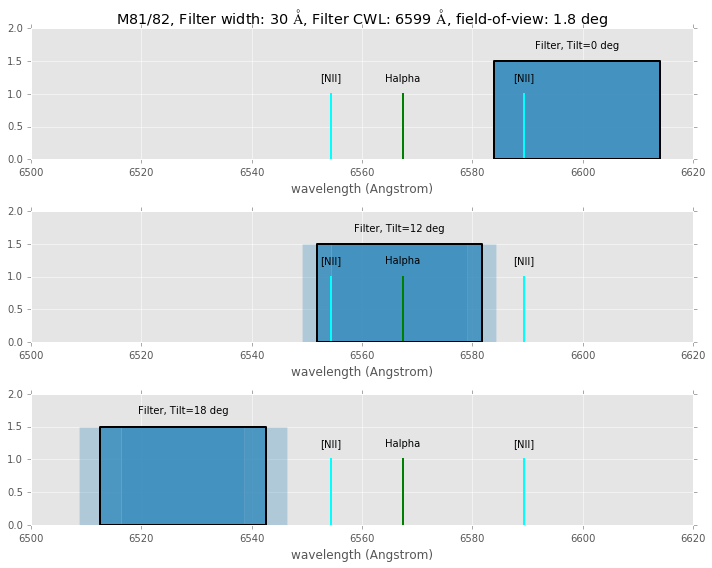

In [21]:
#f, (ax1,ax5) = plt.subplots(2,1, figsize=(15.,10.))
f, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10.,8.))

start=6500.; end=6620.
#plotskybackground2(ax1,start=start,end=end)
#plotskybackground2(ax2,start=start,end=end)
#plotskybackground2(ax3,start=start,end=end)

c = 300000. # km/s
v = 200.    # km/s

for ax in [ax1,ax2,ax3]:
    ax.set_ylim(0,2)
    ax.set_xlim(start,end)
    #ax.set_ylabel('Flux (sky)')
    ax.set_xlabel('wavelength (Angstrom)')

plotfilt(ax1,6563*(1+v/c),1,color='green',label= 'Halpha')
plotfilt(ax1,6585*(1+v/c),1,color='cyan',label= '[NII]')
plotfilt(ax1,6550*(1+v/c),1,color='cyan',label= '[NII]')

plotfilt(ax1,6599,30,color='black',label= 'Filter, Tilt=0 deg',height=1.5)
plotfilter(0,ax1,height=1.5)#,label= 'Filter, Tilt=0 deg')

plotfilt(ax2,6563*(1+v/c),1,color='green',label= 'Halpha')
plotfilt(ax2,6585*(1+v/c),1,color='cyan',label= '[NII]')
plotfilt(ax2,6550*(1+v/c),1,color='cyan',label= '[NII]')

plotfilt(ax2,6599+10*shiftresult[tilt==12],30,color='black',label= 'Filter, Tilt=12 deg',height=1.5)
plotfilter(12,ax2,height=1.5)


plotfilt(ax3,6563*(1+v/c),1,color='green',label= 'Halpha')
plotfilt(ax3,6585*(1+v/c),1,color='cyan',label= '[NII]')
plotfilt(ax3,6550*(1+v/c),1,color='cyan',label= '[NII]')

plotfilt(ax3,6599+10*shiftresult[tilt==18],30,color='black',label= 'Filter, Tilt=18 deg',height=1.5)
plotfilter(18,ax3,height=1.5)

ax1.set_title(r'M81/82, Filter width: 30 $\mathrm{\AA}$, Filter CWL: 6599 $\mathrm{\AA}$, field-of-view: 1.8 deg')
plt.tight_layout()
plt.savefig('FilterSelection.jpg')

662 -- [NII] at the Virgo Cluster -- 1500 km/s

6582.689
6584.0 6614.0
6572.93914034 6602.93914034
6533.96372473 6563.96372473


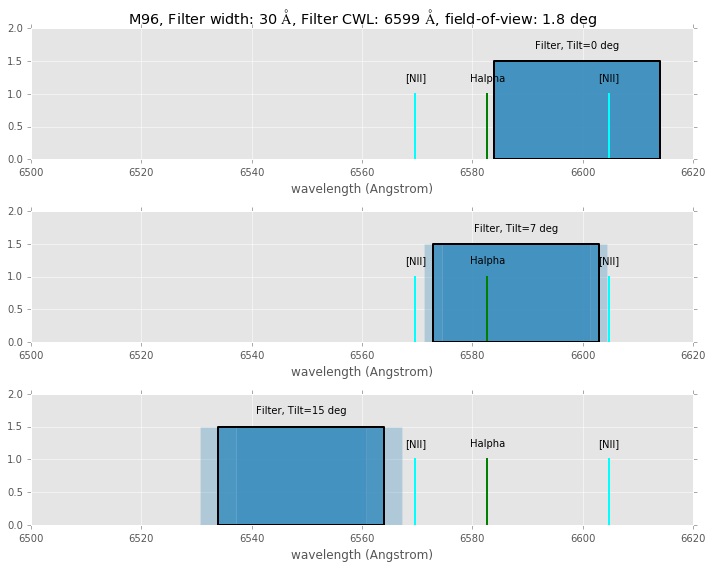

In [20]:
#f, (ax1,ax5) = plt.subplots(2,1, figsize=(15.,10.))
f, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10.,8.))

start=6500.; end=6620.
#plotskybackground2(ax1,start=start,end=end)
#plotskybackground2(ax2,start=start,end=end)
#plotskybackground2(ax3,start=start,end=end)

c = 300000. # km/s
v = 900.    # km/s

for ax in [ax1,ax2,ax3]:
    ax.set_ylim(0,2)
    ax.set_xlim(start,end)
    #ax.set_ylabel('Flux (sky)')
    ax.set_xlabel('wavelength (Angstrom)')

def plotions(ax,v,c):
    plotfilt(ax,6563*(1+v/c),1,color='green',label= 'Halpha')
    plotfilt(ax,6585*(1+v/c),1,color='cyan',label= '[NII]')
    plotfilt(ax,6550*(1+v/c),1,color='cyan',label= '[NII]')

print 6563*(1+v/c)
plotions(ax1,v,c)
plotfilt(ax1,6599.,30,color='black',label= 'Filter, Tilt=0 deg',height=1.5)
plotfilter(0,ax1,height=1.5)#,label= 'Filter, Tilt=0 deg')

plotions(ax2,v,c)
thistilt = 7
plotfilt(ax2,6599.+10.*shiftresult[tilt==thistilt],30,color='black',
         label= 'Filter, Tilt=%s deg'%thistilt,height=1.5)
plotfilter(thistilt,ax2,height=1.5)

plotions(ax3,v,c)
thistilt = 15
plotfilt(ax3,6599.+10.*shiftresult[tilt==thistilt],30,color='black',
         label= 'Filter, Tilt=%s deg'%thistilt,height=1.5)
plotfilter(thistilt,ax3,height=1.5)

ax1.set_title(r'M96, Filter width: 30 $\mathrm{\AA}$, Filter CWL: 6599 $\mathrm{\AA}$, field-of-view: 1.8 deg')
plt.tight_layout()
#plt.savefig('FilterSelection.jpg')

6563.0
6584.0 6614.0
6551.75518996 6581.75518996
6533.96372473 6563.96372473


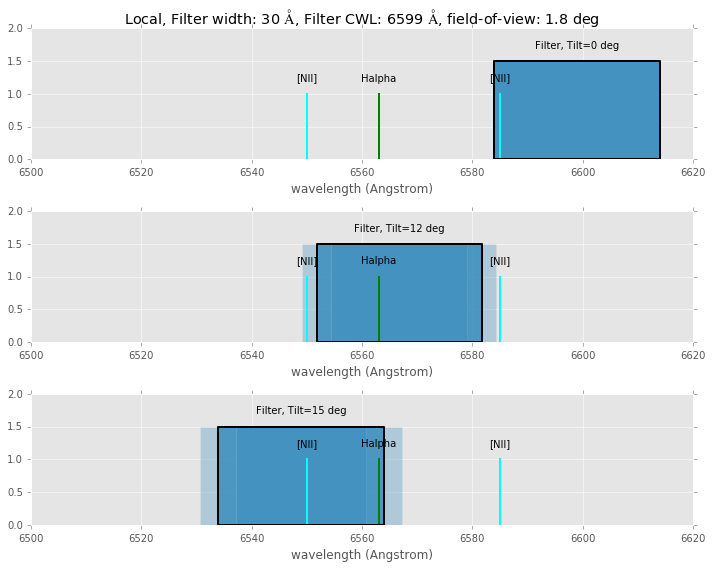

In [30]:
#f, (ax1,ax5) = plt.subplots(2,1, figsize=(15.,10.))
f, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10.,8.))

start=6500.; end=6620.
#plotskybackground2(ax1,start=start,end=end)
#plotskybackground2(ax2,start=start,end=end)
#plotskybackground2(ax3,start=start,end=end)

c = 300000. # km/s
v = 0.    # km/s

for ax in [ax1,ax2,ax3]:
    ax.set_ylim(0,2)
    ax.set_xlim(start,end)
    #ax.set_ylabel('Flux (sky)')
    ax.set_xlabel('wavelength (Angstrom)')

def plotions(ax,v,c):
    plotfilt(ax,6563*(1+v/c),1,color='green',label= 'Halpha')
    plotfilt(ax,6585*(1+v/c),1,color='cyan',label= '[NII]')
    plotfilt(ax,6550*(1+v/c),1,color='cyan',label= '[NII]')

print 6563*(1+v/c)
plotions(ax1,v,c)
plotfilt(ax1,6599.,30,color='black',label= 'Filter, Tilt=0 deg',height=1.5)
plotfilter(0,ax1,height=1.5)#,label= 'Filter, Tilt=0 deg')

plotions(ax2,v,c)
thistilt = 12
plotfilt(ax2,6599.+10.*shiftresult[tilt==thistilt],30,color='black',
         label= 'Filter, Tilt=%s deg'%thistilt,height=1.5)
plotfilter(thistilt,ax2,height=1.5)

plotions(ax3,v,c)
thistilt = 15
plotfilt(ax3,6599.+10.*shiftresult[tilt==thistilt],30,color='black',
         label= 'Filter, Tilt=%s deg'%thistilt,height=1.5)
plotfilter(thistilt,ax3,height=1.5)

ax1.set_title(r'Local, Filter width: 30 $\mathrm{\AA}$, Filter CWL: 6599 $\mathrm{\AA}$, field-of-view: 1.8 deg')
plt.tight_layout()
#plt.savefig('FilterSelection.jpg')